In [1]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

symbol = 'USDJPY=X'
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='2y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-12-05 00:00:00+00:00,136.651993,137.837997,135.612000,136.580002,0,0.0,0.0
2022-12-12 00:00:00+00:00,136.712006,137.942001,134.681000,136.699997,0,0.0,0.0
2022-12-19 00:00:00+00:00,136.029999,137.451996,131.016998,132.759995,0,0.0,0.0
2022-12-26 00:00:00+00:00,132.770004,134.395004,131.110001,131.110001,0,0.0,0.0
2023-01-02 00:00:00+00:00,130.845001,134.740997,129.533997,132.080002,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-04 00:00:00+00:00,152.287003,154.701996,151.343002,152.639999,0,0.0,0.0
2024-11-11 00:00:00+00:00,152.904007,156.746002,152.869995,154.320007,0,0.0,0.0
2024-11-18 00:00:00+00:00,154.664001,155.871994,153.397003,154.770004,0,0.0,0.0


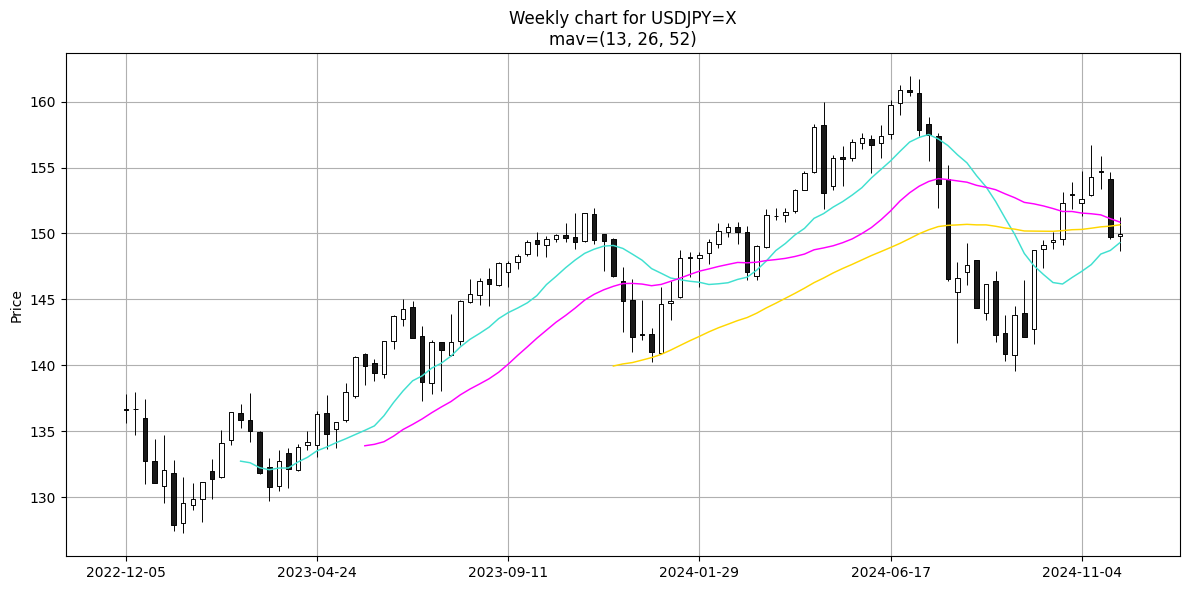

In [2]:
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

mpf.plot(
    df, type='candle', style='default',
    mav=(13, 26, 52),
    volume=False,
    datetime_format='%Y-%m-%d',
    xrotation=0,
    ax=ax,
)
ax.set_title('Weekly chart for %s\nmav=(13, 26, 52)' % symbol)
ax.grid()

plt.tight_layout()
plt.savefig('weekly_chart_exchange.png')
plt.show()

In [3]:
df.tail(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-12-02 00:00:00+00:00,149.815994,151.216995,148.651001,149.988998,0,0.0,0.0


In [4]:
df.tail(2)['Close']

Date
2024-11-25 00:00:00+00:00    149.750000
2024-12-02 00:00:00+00:00    149.988998
Name: Close, dtype: float64

In [5]:
df.tail(2)['Close'].diff()

Date
2024-11-25 00:00:00+00:00         NaN
2024-12-02 00:00:00+00:00    0.238998
Name: Close, dtype: float64

In [6]:
df['Close'].rolling(26).mean()

Date
2022-12-05 00:00:00+00:00           NaN
2022-12-12 00:00:00+00:00           NaN
2022-12-19 00:00:00+00:00           NaN
2022-12-26 00:00:00+00:00           NaN
2023-01-02 00:00:00+00:00           NaN
                                ...    
2024-11-04 00:00:00+00:00    151.547308
2024-11-11 00:00:00+00:00    151.495770
2024-11-18 00:00:00+00:00    151.411924
2024-11-25 00:00:00+00:00    151.123078
2024-12-02 00:00:00+00:00    150.864578
Name: Close, Length: 105, dtype: float64

In [7]:
df['Close'].rolling(52).mean()

Date
2022-12-05 00:00:00+00:00           NaN
2022-12-12 00:00:00+00:00           NaN
2022-12-19 00:00:00+00:00           NaN
2022-12-26 00:00:00+00:00           NaN
2023-01-02 00:00:00+00:00           NaN
                                ...    
2024-11-04 00:00:00+00:00    150.307076
2024-11-11 00:00:00+00:00    150.399192
2024-11-18 00:00:00+00:00    150.501307
2024-11-25 00:00:00+00:00    150.557846
2024-12-02 00:00:00+00:00    150.656500
Name: Close, Length: 105, dtype: float64